In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("eos_vis_parameter_full.csv", 
                      error_bad_lines=False, sep='\t' )
print(data.columns)
cols =  ["m","molarweight","sigma","epsilon_k","kappa_ab","epsilon_k_ab","mu","viscosity" ]
data = data[cols]

data['viscosity'] = data['viscosity'].str.strip('[]').str.split(',')
data[['A','B',"C","D"]] = pd.DataFrame(data.viscosity.tolist(), index=data.index)
data = data.drop('viscosity', axis=1)

data = data.astype('float')
# fill NaNs with NULL
# if no parameter is assigned the parameter is 0 --> makes sense :)
data = data.fillna(0)

data = data[ data.kappa_ab == 0 ]
data = data[ data.mu == 0 ]
data = data.drop(["mu","kappa_ab","epsilon_k_ab"], axis=1)
data["BCD"] = data["B"]+data["C"]+data["D"]

data

Index(['id', 'cas', 'm', 'sigma', 'epsilon_k', 'viscosity', 'molarweight',
       'na', 'nb', 'mard_vis', 't_min_vis', 't_max_vis', 'points_viscosity',
       'date', 'fit_cost', 'fit_optimality', 'note', 'bounds_violation',
       'resd_entrpy_diff', 'opt', 'kappa_ab', 'epsilon_k_ab', 'mu'],
      dtype='object')


/tmp/ipykernel_46281/132022720.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("eos_vis_parameter_full.csv",


,m,molarweight,sigma,epsilon_k,A,B,C,D,BCD
9,3.08870,106.078,3.78100,287.08422,-1.19912,-2.60534,-0.53210,-0.10186,-3.23930
11,2.51627,78.047,3.61064,284.11055,-0.99913,-2.08536,-0.25117,-0.06718,-2.40371
14,2.31121,58.078,3.71557,224.06583,-0.93634,-2.10020,-0.26864,-0.04177,-2.41061
17,2.50027,84.094,3.85128,280.36899,-0.99787,-2.51445,-0.50556,-0.14074,-3.16075
18,2.25774,70.078,3.75308,273.50029,-0.79812,-1.81721,-0.04848,-0.00898,-1.87467
...,...,...,...,...,...,...,...,...,...
149,3.14563,136.125,4.06407,314.30869,-0.39297,-1.09611,0.46112,0.04064,-0.59435
150,2.88557,114.009,3.35657,175.92411,-1.12851,-2.42872,-0.37194,-0.06795,-2.86861
151,3.20055,114.009,3.20351,174.59547,-1.28908,-2.94327,-0.81597,-0.22034,-3.97958
152,4.70545,164.006,3.08281,172.02424,-1.66695,-3.56815,-0.95740,-0.23837,-4.76392


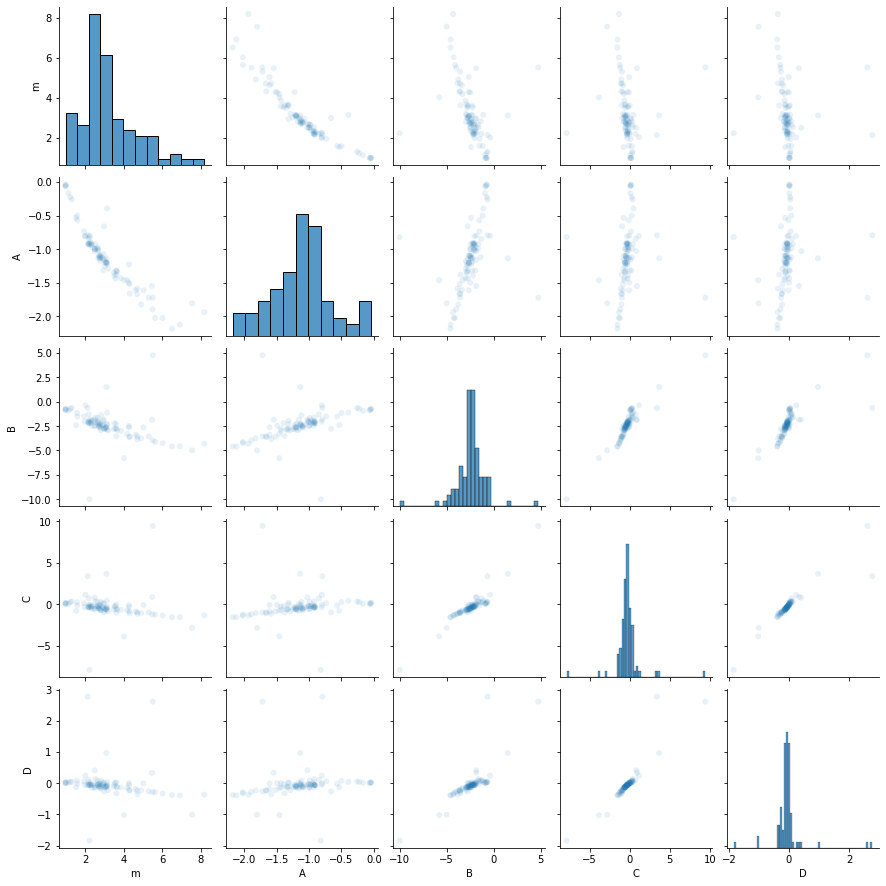

In [3]:
sns.pairplot(data[["m",'A','B',"C","D" ]], plot_kws=dict(alpha=.1, edgecolor='none'))

In [4]:
features = data.corr()['A'].abs().sort_values()
features

sigma          0.000070
D              0.135856
C              0.139983
epsilon_k      0.215610
BCD            0.278503
B              0.446098
molarweight    0.583472
m              0.906956
A              1.000000
Name: A, dtype: float64

In [5]:
features = data.corr()['BCD'].abs().sort_values()
features

epsilon_k      0.125103
molarweight    0.226592
m              0.258513
sigma          0.258903
A              0.278503
D              0.908337
B              0.970653
C              0.988384
BCD            1.000000
Name: BCD, dtype: float64

In [6]:
p = ["m","molarweight","sigma","epsilon_k"]
for key in ['A','B',"C","D","BCD"]:
    features = data[p+[key]].corr()[key].abs().sort_values()
    print(key)
    print(features)
    print("")

A
sigma          0.000070
epsilon_k      0.215610
molarweight    0.583472
m              0.906956
A              1.000000
Name: A, dtype: float64

B
epsilon_k      0.131973
sigma          0.202388
molarweight    0.308148
m              0.409695
B              1.000000
Name: B, dtype: float64

C
epsilon_k      0.109952
m              0.128025
molarweight    0.144834
sigma          0.280582
C              1.000000
Name: C, dtype: float64

D
epsilon_k      0.124057
m              0.145543
molarweight    0.182156
sigma          0.308273
D              1.000000
Name: D, dtype: float64

BCD
epsilon_k      0.125103
molarweight    0.226592
m              0.258513
sigma          0.258903
BCD            1.000000
Name: BCD, dtype: float64



In [7]:
# now we delete B, C, D as we dont need them for the study of A
cols =  ["m","sigma","epsilon_k","A","BCD" ]
data = data[cols]

# one clear outlier detected (A = 6)
data = data[ data.A < 4 ]


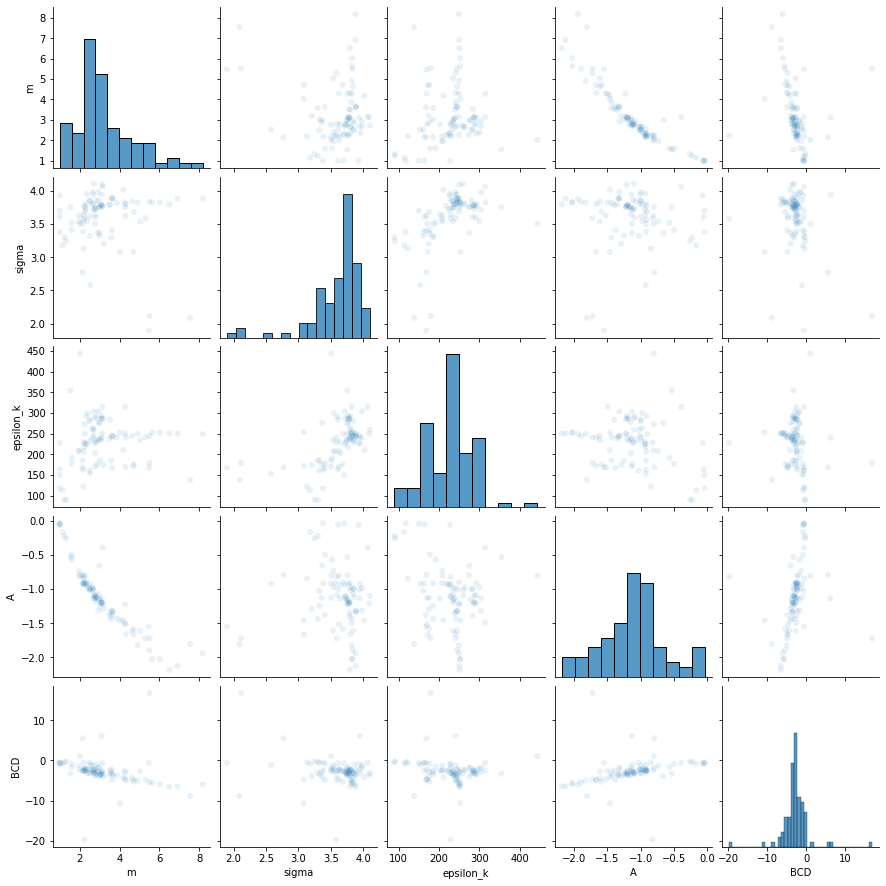

In [8]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

m 1.17


/tmp/ipykernel_46281/2762176479.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[key])


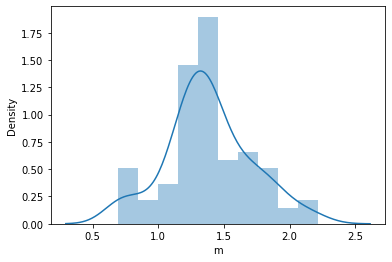

m 0.15

sigma -2.3

epsilon_k 0.15

A 0.21

BCD 0.79



In [9]:
log_border = 1.0
transformed_data = data.copy()
transformed_keys = []
for key in data.columns:
    skew = data[key].skew()
    print(key,skew.round(2))
    if skew > log_border:
        transformed_keys.append(key)
        transformed_data[key] = np.log1p( transformed_data[key] )
        tskew = transformed_data[key].skew()
        sns.distplot(transformed_data[key])
        plt.show()
        plt.close()        
        print(key,tskew.round(2))
    print("")

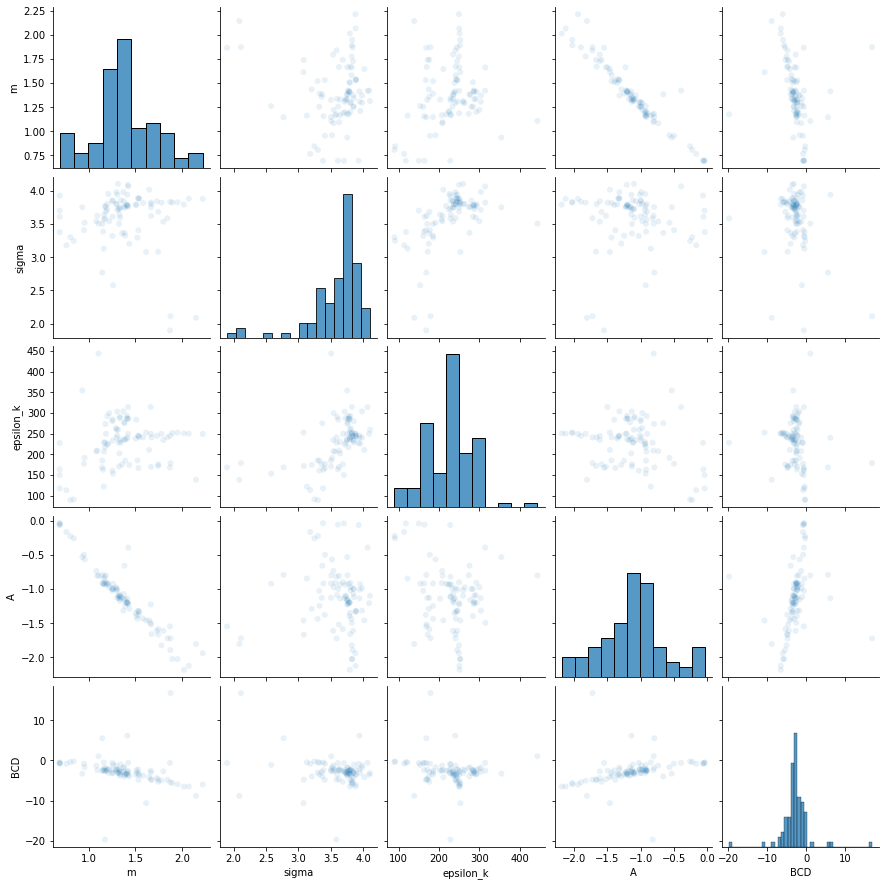

In [10]:
p = ["m","sigma","epsilon_k","A","BCD" ]
transformed_data = transformed_data[p]

sns.pairplot(transformed_data, plot_kws=dict(alpha=.1, edgecolor='none'))

In [11]:
features = transformed_data.corr()['A'].abs().sort_values()
features

sigma        0.000070
epsilon_k    0.215610
BCD          0.278503
m            0.953936
A            1.000000
Name: A, dtype: float64

paras [-1.01612407 -0.04541113]
MEAD 9.13 %


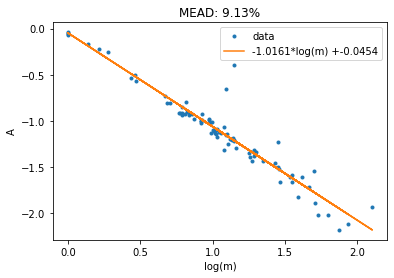

In [21]:
x = np.log( data.m )
#x = np.log( np.sqrt( data.m ) )
y = data.A

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
yy = poly1d_fn(x)
plt.plot( x,y,".", label="data" )
plt.plot( x, yy, label=str(round(coef[0],4))+"*log(m) +"+str(round(coef[1],4)) )

plt.xlabel("log(m)")
plt.ylabel("A")

error = np.mean( np.abs( (y -yy) / y ) )
print("paras",coef)
print( "MEAD", round(error*100,2), "%" )

plt.legend()
plt.title( "MEAD: "+str(round(error*100,2) )+ "%"  )
plt.savefig("mmmodel.pdf")
plt.savefig("mmmodel.png")

paras [-1, 0]
MEAD 14.7 %


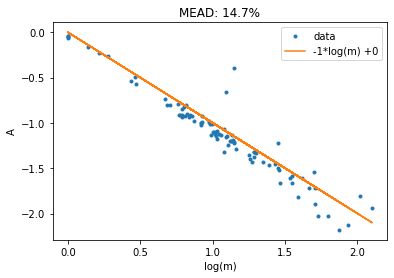

In [13]:
x = np.log( data.m )
y = data.A

coef = [-1,0]
poly1d_fn = np.poly1d(coef) 
yy = poly1d_fn(x)
plt.plot( x,y,".", label="data" )
plt.plot( x, yy, label=str(round(coef[0],4))+"*log(m) +"+str(round(coef[1],4)) )

plt.xlabel("log(m)")
plt.ylabel("A")

error = np.mean( np.abs( (y -yy) / y ) )
print("paras",coef)
print( "MEAD", round(error*100,2), "%" )

plt.legend()
plt.title( "MEAD: "+str(round(error*100,2) )+ "%"  )
plt.savefig("mmmodel.pdf")
plt.savefig("mmmodel.png")

paras [-2.67798259 -0.00749017]
MEAD 53.33 %


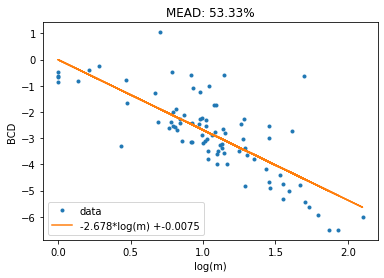

In [14]:
data = data[ data.BCD < 5 ]
data = data[ data.BCD > -8 ]

x = np.log( data.m )
y = data.BCD

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
yy = poly1d_fn(x)
plt.plot( x,y,".", label="data" )
plt.plot( x, yy, label=str(round(coef[0],4))+"*log(m) +"+str(round(coef[1],4)) )

plt.xlabel("log(m)")
plt.ylabel("BCD")

error = np.mean( np.abs( (y -yy) / y ) )
print("paras",coef)
print( "MEAD", round(error*100,2), "%" )

plt.legend()
plt.title( "MEAD: "+str(round(error*100,2) )+ "%"  )
plt.savefig("mmmodel.pdf")
plt.savefig("mmmodel.png")

m            0.020824
epsilon_k    0.080825
A            0.108578
sigma        0.336459
BCD          0.645289
A_diff       1.000000
Name: A_diff, dtype: float64

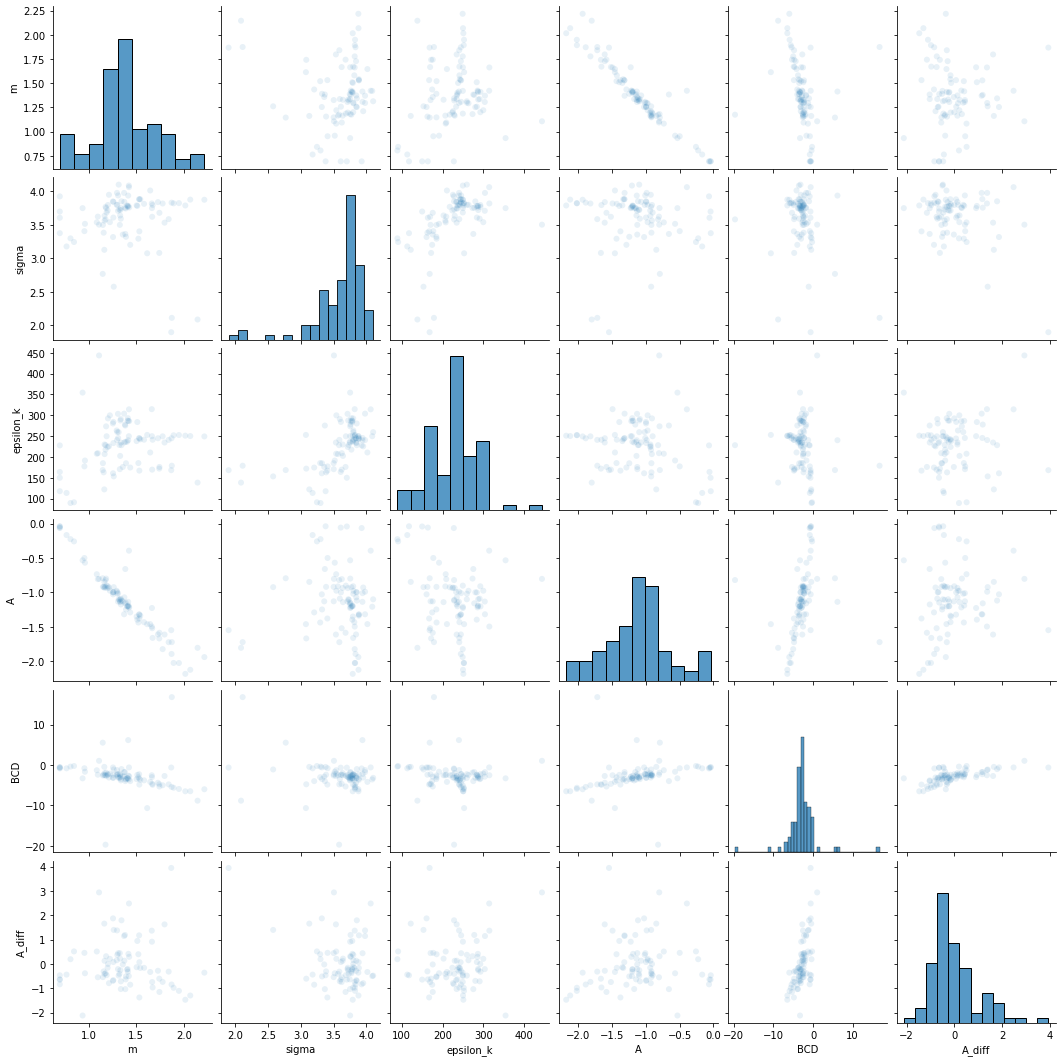

In [15]:
transformed_data["A_diff"] = y- yy
sns.pairplot(transformed_data, plot_kws=dict(alpha=.1, edgecolor='none'))
features = transformed_data.corr()['A_diff'].abs().sort_values()
features

m            0.071202
epsilon_k    0.080825
A            0.108578
sigma        0.336459
BCD          0.645289
A_diff       1.000000
Name: A_diff, dtype: float64

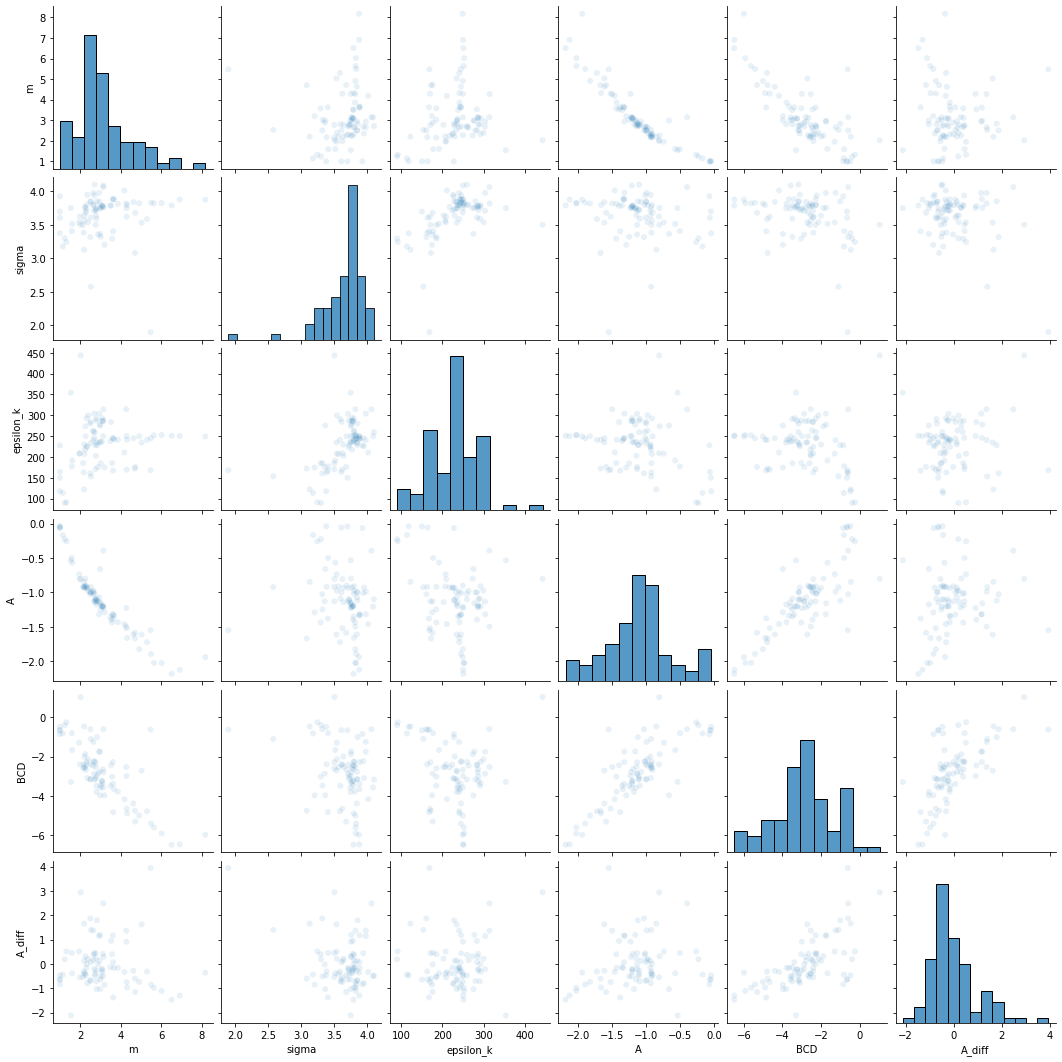

In [16]:
data["A_diff"] = y- yy
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))
features = data.corr()['A_diff'].abs().sort_values()
features

In [17]:
features = transformed_data.corr()['A_diff'].abs().sort_values()
features

m            0.020824
epsilon_k    0.080825
A            0.108578
sigma        0.336459
BCD          0.645289
A_diff       1.000000
Name: A_diff, dtype: float64

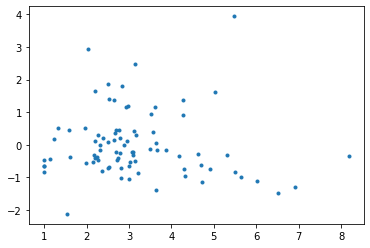

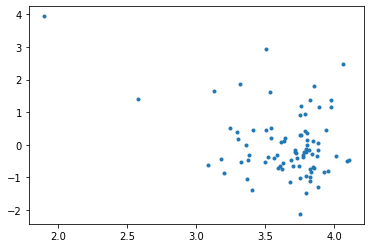

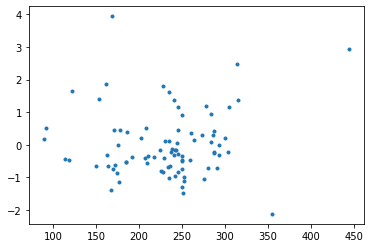

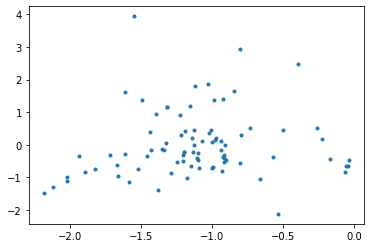

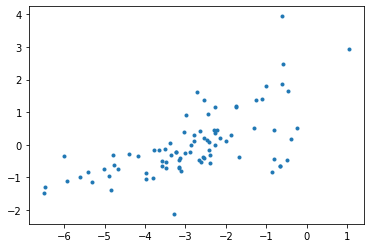

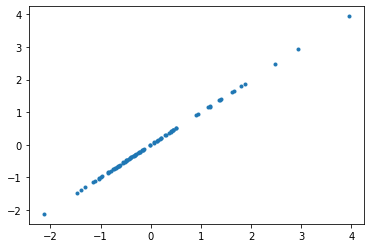

In [18]:
xx = data.A

diff = y -yy



for key in transformed_data.columns:
    plt.plot( data[key], diff, "." )
    plt.show()
    plt.close()

In [19]:
scaler = StandardScaler()
x=scaler.fit_transform(transformed_data.astype(np.float64))

pca = PCA(n_components = 4)
pca.fit_transform(x)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pca.explained_variance_ratio_, np.sum( pca.explained_variance_ratio_ )